Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [19]:
#Подключим необходимые библиотеки для нашего проекта
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [20]:
#Загрузим таблицы в проект
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')
query_last = pd.read_csv('/datasets/query_last.csv')

In [21]:
#Посмотрим на наши таблицы
display(query_1)
display(query_3)
display(query_last)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [22]:
#Изучим таблицы и их типы данных
display(query_1.info())
display(query_3.info())
display(query_last.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


None

Типы данных впорядке, можно двигаться дальше :)

##### Выберем топ 10 городов по количеству рейсов

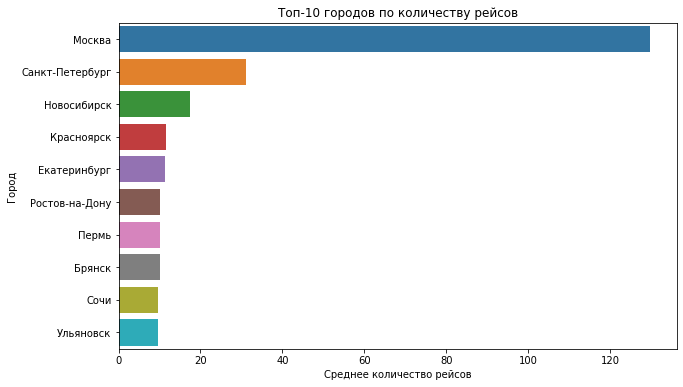

In [40]:
#Отрисуем график с помощью seaborn: топ 10 городов по кол-ву рейсов. выведем с помощью head только 10 городов
plt.figure(figsize=(10,6))
sns.barplot(x='average_flights',
            y='city',
            data=query_3.sort_values(by='average_flights', ascending=False).nlargest(columns=['average_flights'], n=10))
plt.title('Топ-10 городов по количеству рейсов')
plt.xlabel('Среднее количество рейсов')
plt.ylabel('Город');

Больше всего полетов в городах многомиллиониках (Москва, Питер ..)

##### Посторим график модели самолётов и количество рейсов

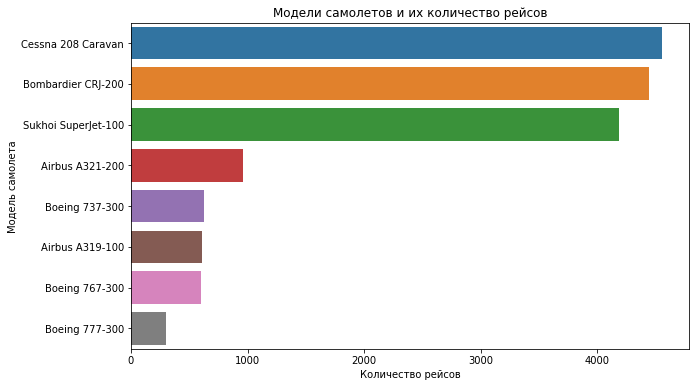

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='flights_amount',
            y='model',
            data=query_1.sort_values(by='flights_amount', ascending=False))
plt.title('Модели самолетов и их количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета');

Больше всего полетов у небольших самолетов таких как cessna, bombardied, sukhoi

##### Отрисуем график всех городов с количеством рейсов

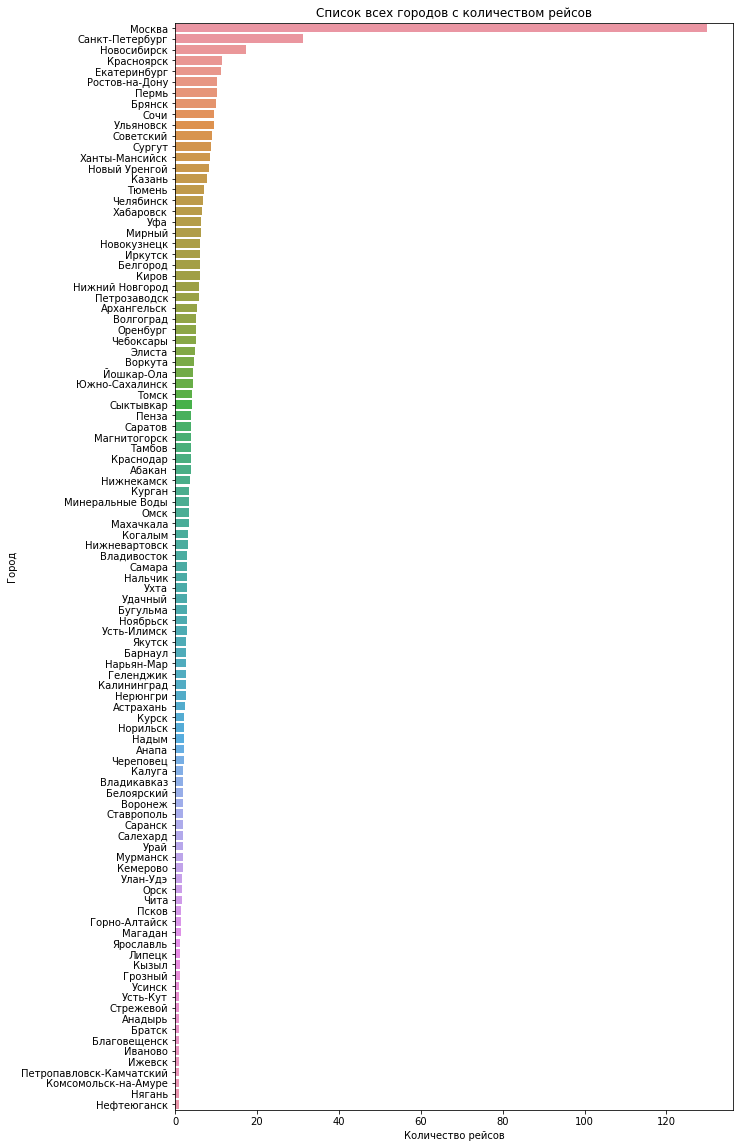

In [42]:
plt.figure(figsize=(10,20))
sns.barplot(x='average_flights',
            y='city',
            data=query_3.sort_values(by='average_flights', ascending=False))
plt.title('Список всех городов с количеством рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город');

Как можно видеть из наших графиков, больше всего приходится авиарейсов на большие города (многомиллионики).

Топ-3 городов с наибольшим количеством авиарейсов:

- Москва, 
- Санкт-Петербург, 
- Новосибирск.

Топ-3 городов с наименьшим количеством авиарейсов:
    
- Нефтеюганск,
- Нягань,
- Комсомольск-на-Амуре


Чаще всего летают самолеты малой авиации :
- Cessna
- Bombardier
- Sukhoi SuperJet

На последнем месте по количеству рейсов Boeing 777-300 




# 2. Проверка гипотезы

Гипотезы:

- H0: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
- H1: Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

Нам надо проверить равенство средних в выборке количества билетов в неделю, когда есть фестивали и когда их нет. Используем для этого t-test Стьюдента.

In [9]:
sample1 = query_last.loc[query_last['festival_week'].isna(), 'ticket_amount']
sample2 = query_last.loc[~query_last['festival_week'].isna(), 'ticket_amount']

assert (sample1.shape[0] + sample2.shape[0]) == query_last.shape[0]

In [10]:
res = st.ttest_ind(sample1, sample2, equal_var=True)
res.pvalue

0.09688869045922928

Как мы видим pvalue > 0.05, соответвенно мы не отвергаем 0 гипотезу.
Мы не можем утверждать о статистически значимой разнице между спрос на билеты во время фестивалей и в обычное время

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  Проверена гипотеза «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»
- [x]  Есть пояснение «Как вы формулировали нулевую и альтернативную гипотезы»
- [x]  Есть пояснение «Какой критерий использовали для проверки гипотез и почему»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод